In [45]:
import pandas as pd
import numpy as np
import math
import requests
import io
import seaborn as sns


## Exercises
#### Using the repo setup directions, setup a new local and remote repository named anomaly-detection-exercises. The local version of your repo should live inside of ~/codeup-data-science. This repo should be named anomaly-detection-exercises

Save this work in your anomaly-detection-exercises repo. Then add, commit, and push your changes.

continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

1. Using lemonade.csv dataset and focusing on continuous variables:

 - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
 - Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
 - Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
 - Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?
2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

 - Do these make sense?
 - Should certain outliers be kept or removed?
3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [6]:
# https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv
    

In [7]:

url= "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [9]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [10]:
df.Date

0        1/1/17
1        1/2/17
2        1/3/17
3        1/4/17
4        1/5/17
         ...   
360    12/27/17
361    12/28/17
362    12/29/17
363    12/30/17
364    12/31/17
Name: Date, Length: 365, dtype: object

In [11]:
# Reassign the sale_date column to be a datetime type

pd.to_datetime('1/03/17', format='%m/%d/%y')
df.Date = pd.to_datetime(df.Date, format='%m/%d/%y')

In [12]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [14]:
df = df.set_index('Date').sort_index()
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [ ]:
# # IQR = Q3 - Q1
# # ul = Q3+1.5*IQR
# # ll = Q1-1.5*IQR
# def mod_outlier(df):
#         df1 = df.copy()
#         df = df._get_numeric_data()


#         q1 = df.quantile(0.25)
#         q3 = df.quantile(0.75)

#         iqr = q3 - q1

#         lower_bound = q1 -(1.5 * iqr) 
#         upper_bound = q3 +(1.5 * iqr)


#         for col in col_vals:
#             for i in range(0,len(df[col])):
#                 if df[col][i] < lower_bound[col]:            
#                     df[col][i] = lower_bound[col]

#                 if df[col][i] > upper_bound[col]:            
#                     df[col][i] = upper_bound[col]    


#         for col in col_vals:
#             df1[col] = df[col]

#         return(df1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 20.0+ KB


In [25]:
def get_numerical():
    numerical_df = df.dtypes[df.dtypes != "object"].index

In [60]:
def get_lower_and_upper_bounds_allcols(df, m):
    numerical_df = df._get_numeric_data()
    for col in numerical_df:
        numerical_df = df._get_numeric_data()
        q1 = numerical_df.quantile(.25)
        q3 = numerical_df.quantile(.75)
        iqr = q3 - q1
        lower_bound = q1 -(m * iqr) #m for multiples whatever multiple i pick out
        upper_bound = q3 +(m * iqr)
    return lower_bound, upper_bound

In [51]:
def get_lower_and_upper_bounds(col, m):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 -(m * iqr) #m for multiples whatever multiple i pick out
    upper_bound = q3 +(m * iqr)
    return lower_bound, upper_bound

In [61]:
get_lower_and_upper_bounds_allcols(df,1.5)

(Temperature    16.70
 Rainfall        0.26
 Flyers          4.00
 Price           0.50
 Sales           5.00
 dtype: float64,
 Temperature    104.7
 Rainfall         1.3
 Flyers          76.0
 Price            0.5
 Sales           45.0
 dtype: float64)

In [49]:
get_lower_and_upper_bounds(df.Rainfall,1.5)

(Temperature    16.70
 Rainfall        0.26
 Flyers          4.00
 Price           0.50
 Sales           5.00
 dtype: float64,
 Temperature    104.7
 Rainfall         1.3
 Flyers          76.0
 Price            0.5
 Sales           45.0
 dtype: float64)

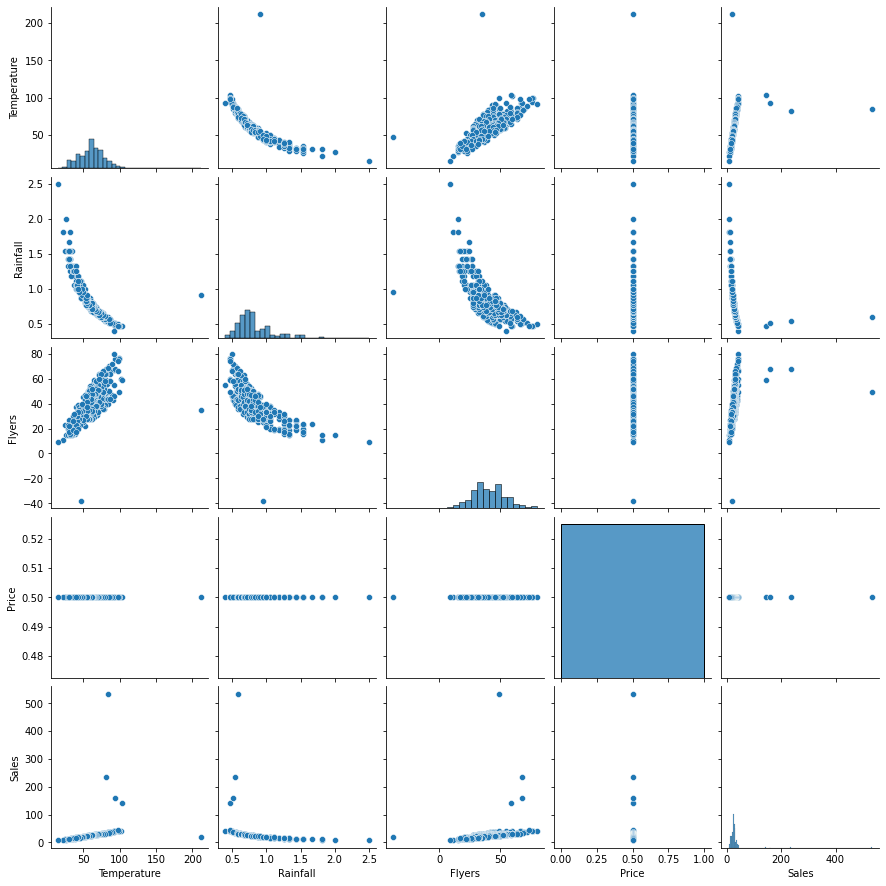

In [46]:
sns.pairplot(df)


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0
